# Install all the packages

In [2]:
!pip install scipy
!pip install numpy
!pip install matplotlib
!pip install pandas

# Import all the packages

In [2]:
import scipy
from matplotlib import pyplot as plt
import numpy as np
import timeit 
import glob
import pandas as pd
import matplotlib.pyplot as plt
import string
import time
import matplotlib.pyplot as plt
import numpy as np

# Load Data


In [3]:
def get_test_data():
    
    files = glob.glob('./BLM_R5IM_Data/cycle/*.csv')
    selected_file = files[0]
    x_data = np.linspace(-0.5, 10.5, 2200)

    #use x_data as x-coordinate when performing calculations
    input_data = pd.read_csv(selected_file)
    data = input_data.drop(columns = input_data.columns[0]).to_numpy()
    
    return (data, x_data)



# Interpolation function from group F

In [4]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

def calibration_curve_beta(data_points):
    '''
    #todo
    '''    
    x = np.array([70, 172, 374, 617, 780])
    y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])

    
    a_s = divided_diff(x, y)[0, :]
    x_new = np.linspace(0, 800, data_points) 
    return newton_poly(a_s, x, x_new)




In [5]:
x = np.array([70, 172, 374, 617, 780])
y = np.array([2.22E-13, 2.59E-13, 4.31E-12, 1.60E-11, 3.50E-11])

a_s = divided_diff(x, y)[0, :]

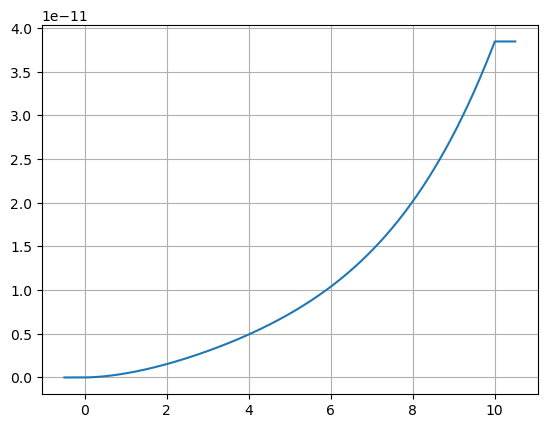

In [9]:
 data_points = 2366
x_data = np.linspace(-55, 800, data_points)

plt.grid()
calibration_curve = calibration_curve_beta(len(x_data))
# plt.plot(x_data, calibration_curve)
# plt.scatter(x,y)

calibration_curve = calibration_curve[366:]

start = np.full(100,calibration_curve[0])
end = np.full(100,calibration_curve[-1])
calibration_curve = np.array([*start,*calibration_curve, *end])
plt.plot(np.linspace(-.5, 10.5 , 2200), calibration_curve)

# yoffset from group A

In [15]:
def offset_y_data(data, offset = None, n = None, SpecialPoint = None):
    '''Offsets data in y axis by designated value.
    '''

    out = data

    if offset != None:
        out = data + offset
    if SpecialPoint != None:
        out = data - SpecialPoint
        return out

    elif isinstance(n, int):
        if n > 0:
            offset = np.mean(data[:n])
        elif n < 0:
            offset = np.mean(data[n:])
        else:
            raise ValueError("Invalid value for n")
        out = data - offset
    
    return out

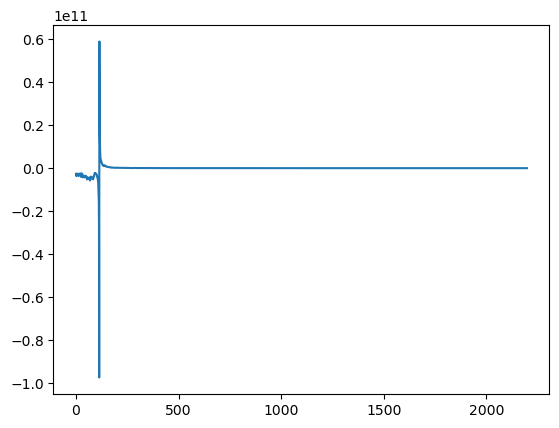

In [17]:
def find_diff_between_adj(cumultive_integral):
    diff_integral = np.diff(cumultive_integral ) # take the difference bettwen each vaule 
                                   # in order to the bucket value not the vaule from the the 
    diff_integal = np.insert(diff_integral, 0, cumultive_integral[0])
    
    return diff_integal

def get_integral(blm_signal, x):
    integral = scipy.integrate.cumulative_trapezoid(blm_signal, x=x)
    return find_diff_between_adj(integral)

    
    
blm_data,time = get_test_data()
blm_data = offset_y_data(blm_data[10], SpecialPoint=np.min(blm_data[10]))
plt.plot(Convert.to_protons(blm_data, time, calibration_curve))